# Interpretation of the Principal Components

Using correlation anaylisis to understand principal components. 
For more informaiton see:https://online.stat.psu.edu/stat505/lesson/11/11.4

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append(r"C:\Users\robal\Dropbox\UChicago\Year II\Quarter I\Mathematical Foundations for ML\FinalProject\InterpretableDimRed")

In [23]:
import numpy as np 
import numpy.linalg as la
from InterpretableDimRed.utils import pca_svd_utils as psa
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
# Update data directory with path to folder in tyour local computer
data_directory = "C:\\Users\\robal\\Dropbox\\UChicago\\Year II\\Quarter I\\Mathematical Foundations for ML\\FinalProject\\InterpretableDimRed\\InterpretableDimRed\\RawData\\"

# Using Dataset 1: Heart Disease Data
For more info on this dataset see: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

In [47]:
heart_data = pd.read_csv(data_directory + "heartDisease.csv")
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [48]:
X = heart_data.loc[:,"age":"thal"]
Y =  heart_data.loc[:,"target"]
# Convert 0 in Y to -1s
Y[Y==0] = -1

## Step 1 get SVD of feature matrix and plot the spectrum of X

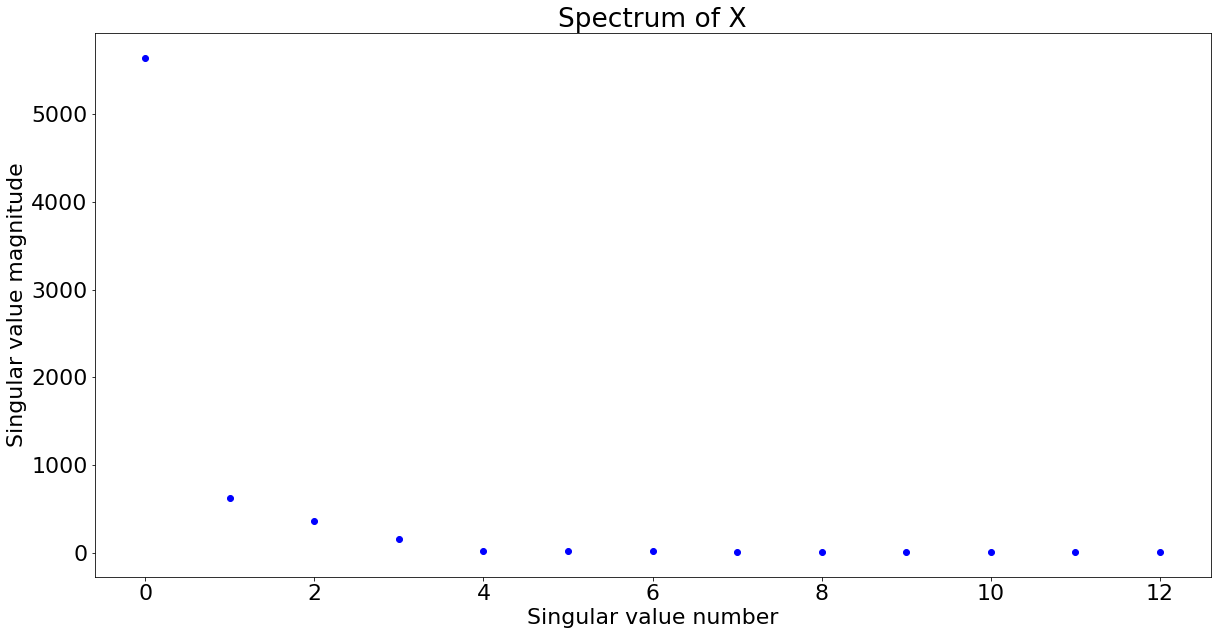

In [49]:
psa.plot_spectrum(X.T)

In [50]:
pca = PCA(n_components=1, svd_solver='full')
pca.fit(X.T)
pca.explained_variance_ratio_

array([0.97843604])

We can see from the SVD above that the first singular value is more than 5x larger in magnitude than the second largest singular value. From this plot we can infer that by using dimensionality reduction we could keep much of the  dataset's variance by using only the first principal component. By reducing the original feature Matrix X and using only its first principal component the amount of variance explained is .98

## Step 2: Find correlation between Principal Component Vectors and original feature vectors

In [51]:
psa.corr_pc_features(X, pca.components_)

,PC1
age,0.162218
sex,-0.209619
cp,-0.006785
trestbps,0.242194
chol,0.969772
fbs,0.033335
restecg,-0.152385
thalach,0.194577
exang,-0.008679
oldpeak,0.001272


Above we see the correlation for each feature and the firt principal component vector. We can see that cholesterol has the largest correlation with the first principal component.

## Step 3: compare classification accuracy when using original features vs reduced dimension features
For consistency and valid comparisons classification will be done using a least squares classifier.

In [53]:
X_train, X_test, y_train, y_test = psa.train_test_split_w(X,Y)
y_predicted = psa.least_squares_classifier(X_train.values, X_test.values, y_train.values)
print("""Accuracy score on the test set for a LS classifier using the original feature space is: {}""".format(accuracy_score(y_test.values, y_predicted)))


X_train_pca, X_test_pca, y_train_pca, y_test_pca = psa.train_test_split_w(pca.components_.T,Y)
y_predicted_pca = psa.least_squares_classifier(X_train_pca, X_test_pca, y_train_pca.values)
print("""Accuracy score on the test set for a LS classifier using principal component vectors space is {}""".format(accuracy_score(y_test_pca.values, y_predicted_pca)))

Accuracy score on the test set for a LS classifier using the original feature space is: 0.819672131147541
Accuracy score on the test set for a LS classifier using principal component vectors space is 0.5573770491803278


# Using Dataset 2: Divorce Data

In [4]:
divorce_data = pd.read_excel(data_directory + "divorce.xlsx")
divorce_data.head()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [10]:
X = divorce_data.loc[:,"Atr1":"Atr54"]
Y =  divorce_data.loc[:,"Class"]
# Convert 0 in Y to -1s
Y[Y==0] = -1

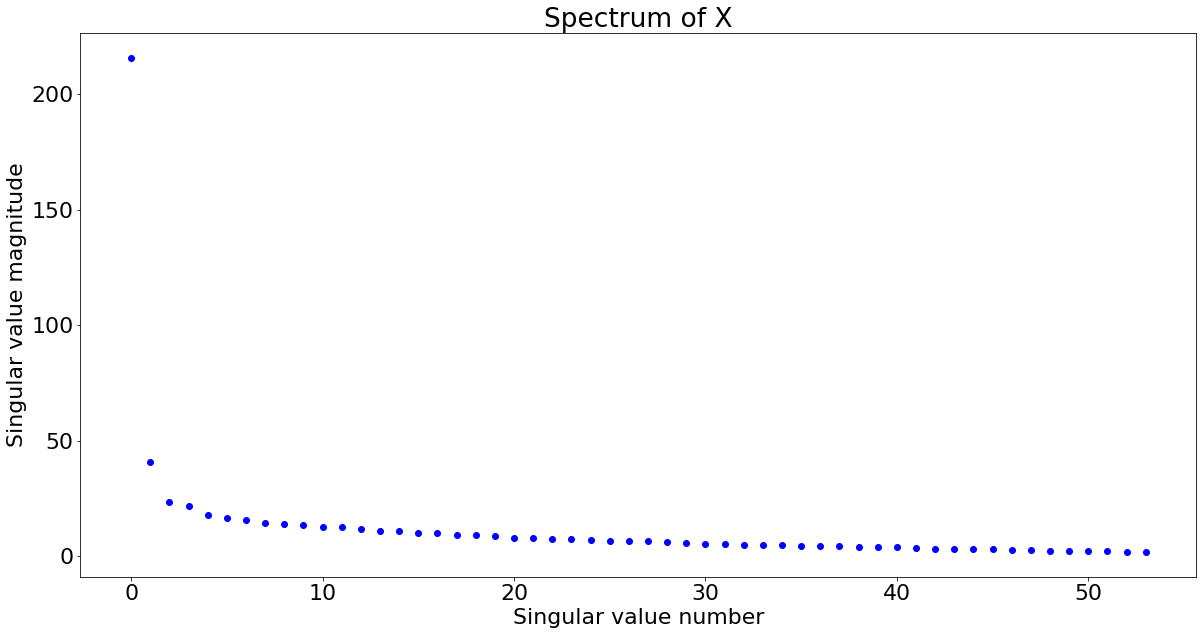

In [19]:
psa.plot_spectrum(X)

As was the case with the Heart Disease data, it seems that for the divorce data the first singular values is much larger than the rest. So we will only use the first principal component corresponding to this fist singular value.

In [21]:
pca = PCA(n_components=1, svd_solver='full')
pca.fit(X.T)
pca.explained_variance_ratio_

array([0.3073629])

In [27]:
psa.corr_pc_features(X, pca.components_)

Atr1     0.301177
Atr2     0.312338
Atr3     0.339825
Atr4     0.347042
Atr5     0.182460
Atr6     0.213003
Atr7     0.450566
Atr8     0.298242
Atr9     0.292246
Atr10    0.417972
Atr11    0.301068
Atr12    0.390675
Atr13    0.241013
Atr14    0.350641
Atr15    0.340684
Atr16    0.398644
Atr17    0.283929
Atr18    0.381827
Atr19    0.272159
Atr20    0.338720
Atr21    0.223040
Atr22    0.236299
Atr23    0.080737
Atr24    0.284131
Atr25    0.193020
Atr26    0.325623
Atr27    0.232123
Atr28    0.280038
Atr29    0.172164
Atr30    0.320710
Atr31    0.052931
Atr32    0.134082
Atr33    0.074178
Atr34    0.046801
Atr35    0.064518
Atr36    0.074376
Atr37    0.147227
Atr38    0.145994
Atr39    0.157966
Atr40    0.192247
Atr41    0.160132
Atr42   -0.079227
Atr43   -0.250965
Atr44    0.071073
Atr45   -0.302679
Atr46   -0.421195
Atr47   -0.212946
Atr48   -0.119017
Atr49   -0.068095
Atr50   -0.064275
Atr51   -0.120621
Atr52   -0.197210
Atr53   -0.052237
Atr54    0.027393
Name: PC1, dtype: float64

In this case, it seems the first principal component is highly correlated with multiple features. In order to further understand which features have the largest abs correlation we can plot the top 5.

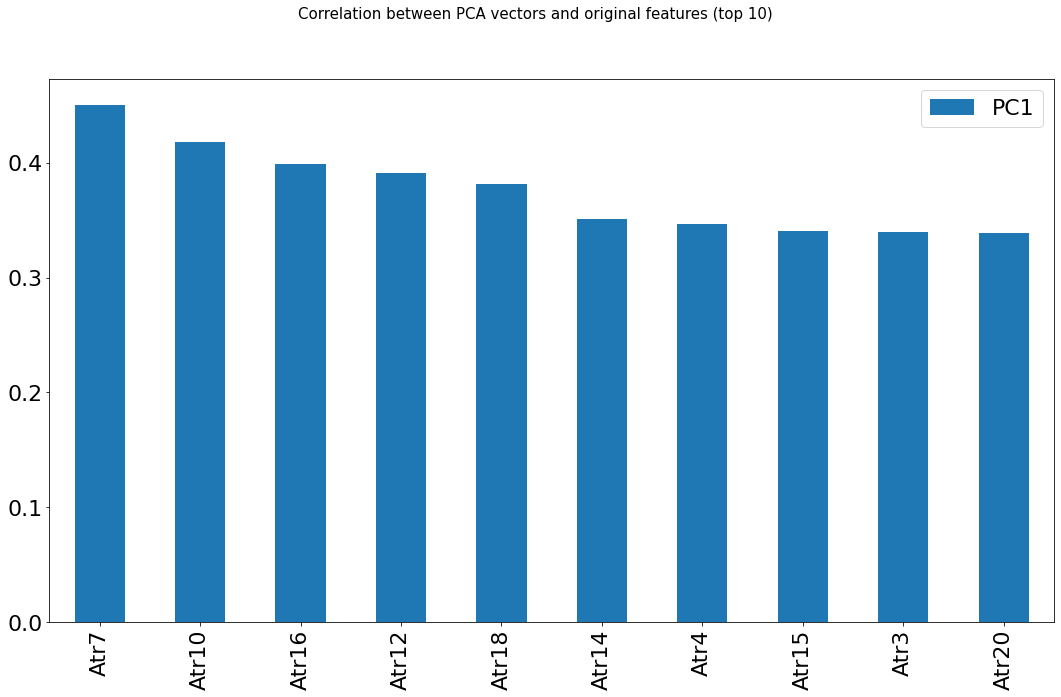

In [44]:
psa.plot_feature_pca_corr(X, pca.components_, 10)

In [46]:
X_train, X_test, y_train, y_test = psa.train_test_split_w(X,Y)
y_predicted = psa.least_squares_classifier(X_train.values, X_test.values, y_train.values)
print("""Accuracy score on the test set for a LS classifier using the original feature space is: {}""".format(accuracy_score(y_test.values, y_predicted)))


X_train_pca, X_test_pca, y_train_pca, y_test_pca = psa.train_test_split_w(pca.components_.T,Y)
y_predicted_pca = psa.least_squares_classifier(X_train_pca, X_test_pca, y_train_pca.values)
print("""Accuracy score on the test set for a LS classifier using principal component vectors space is: {}""".format(accuracy_score(y_test_pca.values, y_predicted_pca)))

Accuracy score on the test set for a LS classifier using the original feature space is: 1.0
Accuracy score on the test set for a LS classifier using the original feature space is: 0.5
